In [1]:
import os
from google.colab import drive
drive.mount('drive/')

Drive already mounted at drive/; to attempt to forcibly remount, call drive.mount("drive/", force_remount=True).


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.chdir('drive/My Drive/Cours Python Hetic/Ressource journée 5')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [5]:
df = pd.read_csv("energy_use_in_the_UK.csv", sep=";", quotechar=";")

In [6]:
df.dtypes

 timestamp     object
 coal           int64
 nuclear        int64
 wind           int64
 hydro          int64
 solar        float64
dtype: object

In [7]:
df.columns

Index([' timestamp', ' coal', ' nuclear', ' wind', ' hydro', ' solar'], dtype='object')

In [8]:
df

,timestamp,coal,nuclear,wind,hydro,solar
0,2012-01-01 00:00:01,8693,7121,2740,728,0.0
1,2012-01-01 00:05:06,8650,7120,2812,732,0.0
2,2012-01-01 00:10:01,8880,7125,2896,744,0.0
3,2012-01-01 00:15:01,9111,7122,2964,748,0.0
4,2012-01-01 00:20:01,9195,7114,2992,750,0.0
...,...,...,...,...,...,...
796448,2019-08-03 19:50:34,0,5466,687,408,119.0
796449,2019-08-03 19:55:37,0,5435,685,407,122.0
796450,2019-08-03 20:00:39,0,5404,682,405,127.0
796451,2019-08-03 20:05:34,0,5380,689,389,11.5


Pour enlever les espaces avant chaque nom de colones

In [9]:
df.columns = df.columns.str.strip()

In [10]:
df["timestamp"] = pd.to_datetime(df["timestamp"]) # pour que xa reconnaisse la colone comme temps

In [11]:
df = df.set_index("timestamp") # pour virer les index 

In [12]:
df.head()

,coal,nuclear,wind,hydro,solar
timestamp,,,,,
2012-01-01 00:00:01,8693,7121,2740,728,0.0
2012-01-01 00:05:06,8650,7120,2812,732,0.0
2012-01-01 00:10:01,8880,7125,2896,744,0.0
2012-01-01 00:15:01,9111,7122,2964,748,0.0
2012-01-01 00:20:01,9195,7114,2992,750,0.0


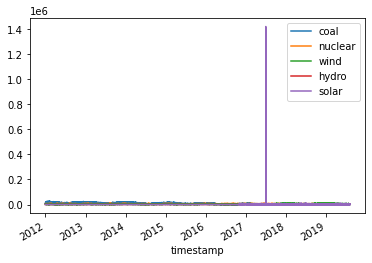

In [13]:
df.plot()

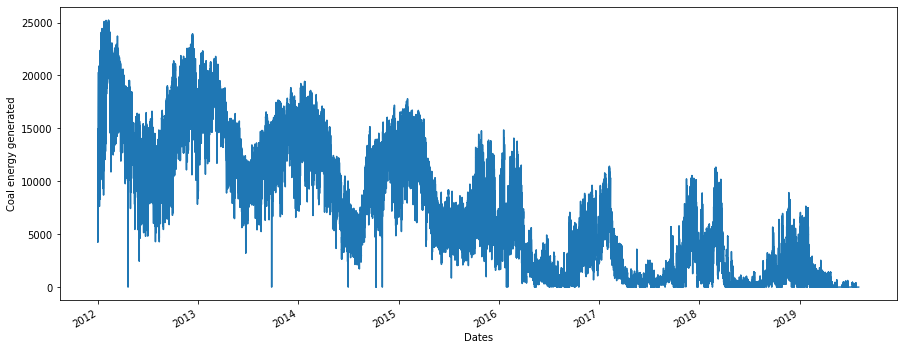

In [14]:
df['coal'].plot(figsize=(15, 6))
plt.xlabel('Dates')
plt.ylabel('Coal energy generated')
plt.show()

eliminer toutes les valeur qui sont a zero

In [15]:
df['coal'].replace({0 : np.nan}, inplace=True)

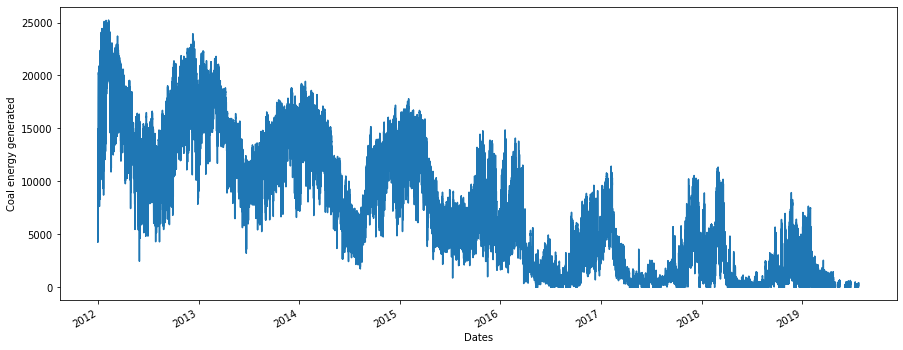

In [16]:
df['coal'].plot(figsize=(15, 6))
plt.xlabel('Dates')
plt.ylabel('Coal energy generated')
plt.show()

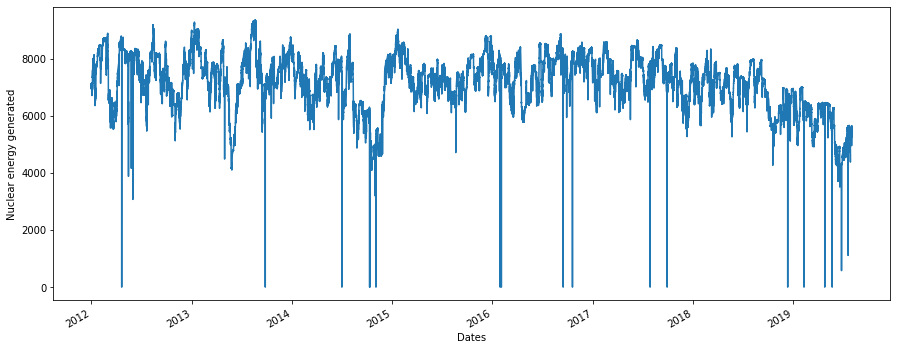

In [17]:
df['nuclear'].plot(figsize=(15, 6))
plt.xlabel('Dates')
plt.ylabel('Nuclear energy generated')
plt.show()


In [18]:
df['nuclear'].clip(lower=3000, inplace=True) # .clip permet de mettre une valeur minimal ou maximal

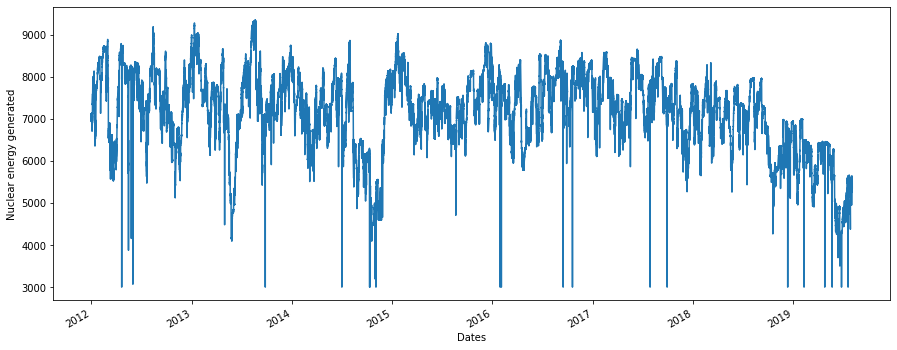

In [19]:
df['nuclear'].plot(figsize=(15, 6))
plt.xlabel('Dates')
plt.ylabel('Nuclear energy generated')
plt.show()

wind

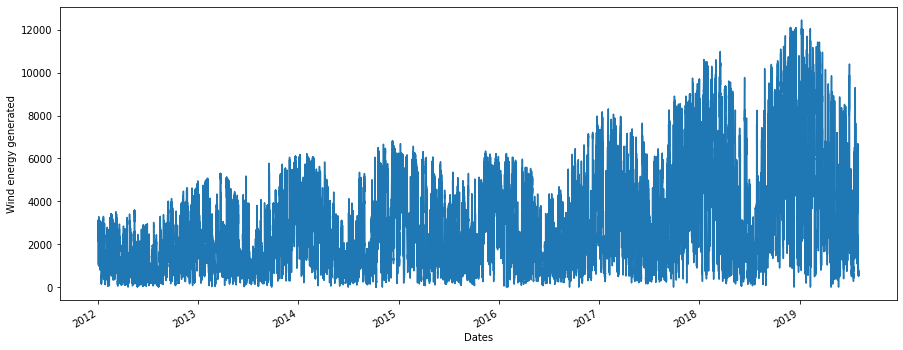

In [20]:
df['wind'].plot(figsize=(15, 6))
plt.xlabel('Dates')
plt.ylabel('Wind energy generated')
plt.show()

hydro

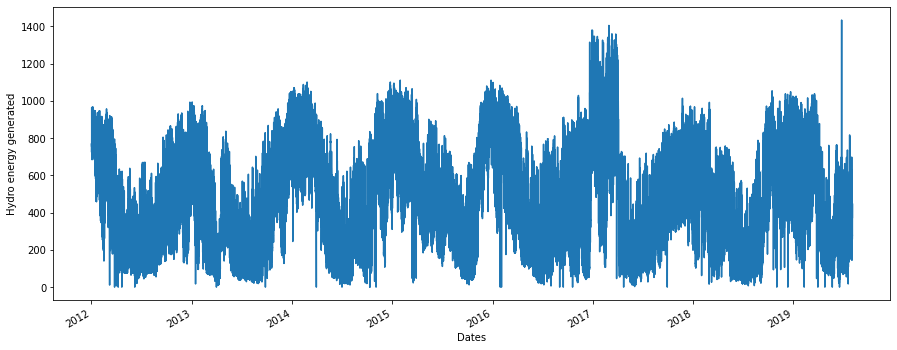

In [21]:
df['hydro'].plot(figsize=(15, 6))
plt.xlabel('Dates')
plt.ylabel('Hydro energy generated')
plt.show()

In [22]:
df['hydro'].replace({0 : np.nan}, inplace=True)

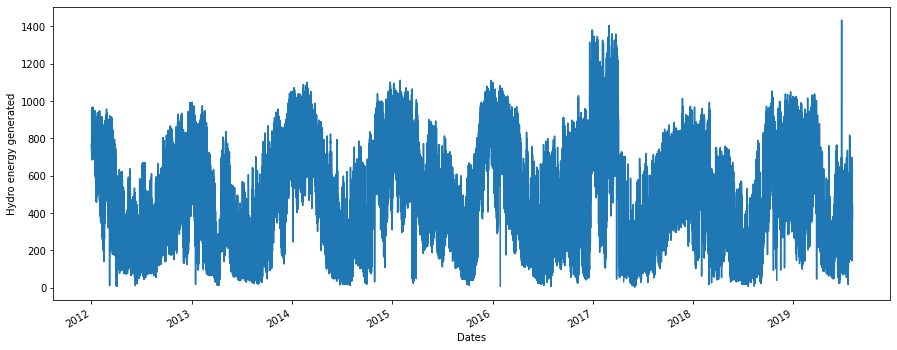

In [23]:
df['hydro'].plot(figsize=(15, 6))
plt.xlabel('Dates')
plt.ylabel('Hydro energy generated')
plt.show()

Solar

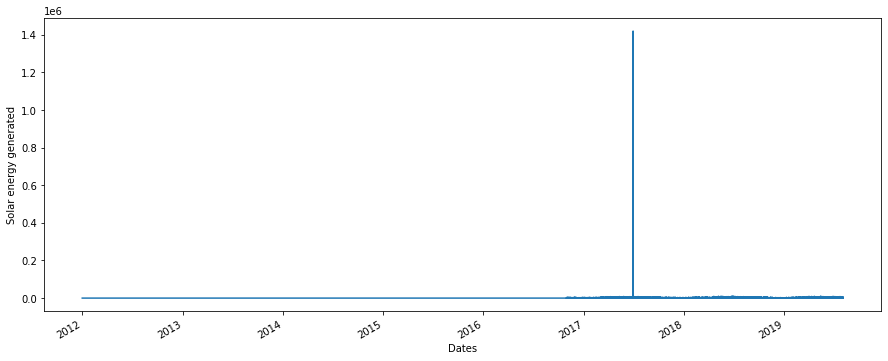

In [24]:
df['solar'].plot(figsize=(15, 6))
plt.xlabel('Dates')
plt.ylabel('Solar energy generated')
plt.show()

In [25]:
df['solar'].values[-10 :]

array([384. , 391. , 116. , 118. , 119. , 119. , 122. , 127. ,  11.5,
        11.5])

In [26]:
np.sort(df['solar'].values)[-10:]

array([   9190.,    9200.,    9310.,    9310.,    9310.,    9630.,
          9630.,    9630., 1420000., 1420000.])

In [27]:
df['solar'].clip(upper=9630, inplace=True) # .clip permet de mettre une valeur minimal ou maximal

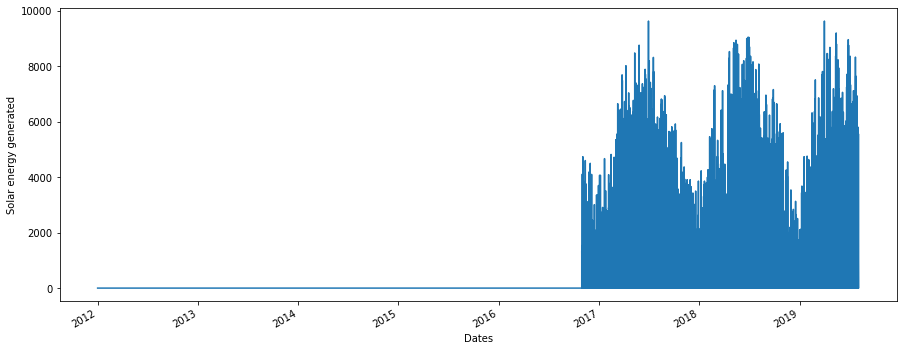

In [28]:
df['solar'].plot(figsize=(15, 6))
plt.xlabel('Dates')
plt.ylabel('Solar energy generated')
plt.show()

In [29]:
solar = df['solar']

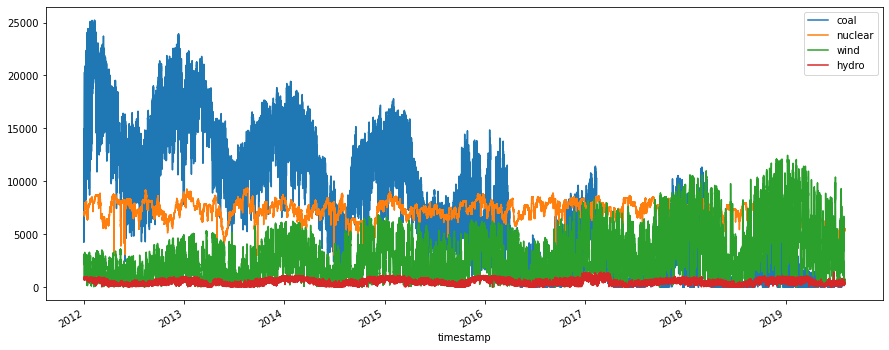

In [30]:
df_without_solar = df.drop(columns=['solar'])
df_without_solar.plot(figsize=(15, 6))


In [31]:
df_without_solar_per_day = 24*12*df_without_solar.resample('D').mean()

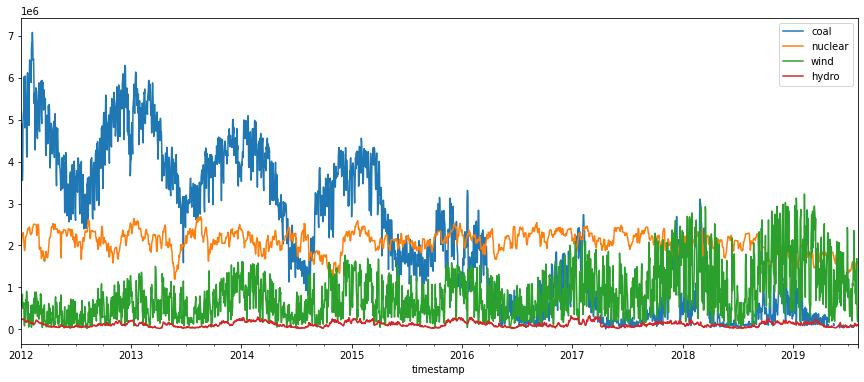

In [32]:
df_without_solar_per_day.plot(figsize=(15, 6))

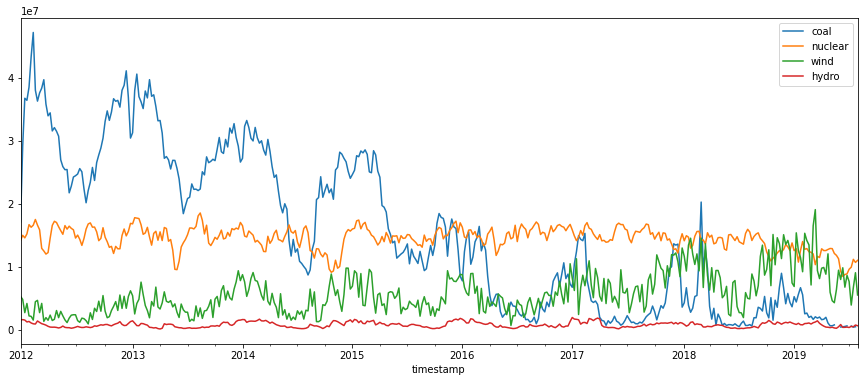

In [33]:
df_without_solar_per_week = 7*24*12*df_without_solar.resample('W').mean()
df_without_solar_per_week.plot(figsize=(15, 6))

In [34]:
df_without_solar_per_day.interpolate('linear', inplace=True)

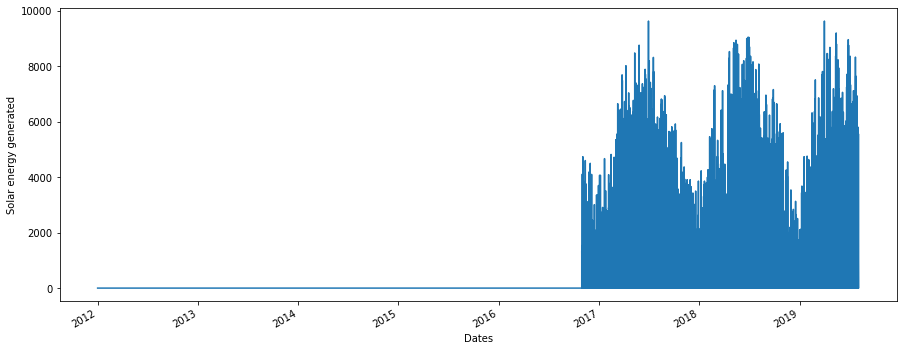

In [35]:
df['solar'].plot(figsize=(15, 6))
plt.xlabel('Dates')
plt.ylabel('Solar energy generated')
plt.show()

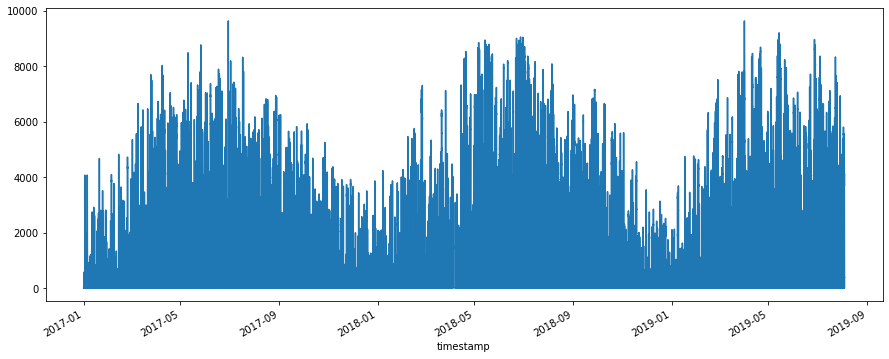

In [36]:
start_date = "2017-01-01"
solar = solar[solar.index >= start_date]
solar.plot(figsize=(15, 6))

In [37]:
pwd

'/content/drive/MyDrive/Cours Python Hetic/Ressource journée 5'

In [38]:
solar.to_csv('./solar.csv')
df_without_solar_per_day.to_csv("./df_without_solar_per_day.csv")